<img src='../img/theory/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류 - 개 / 고양이 분류하기
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg' width=60%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---개,-고양이-분류하기" data-toc-modified-id="예제---개,-고양이-분류하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - 개, 고양이 분류하기</a></span><ul class="toc-item"><li><span><a href="#데이터-불러올-준비" data-toc-modified-id="데이터-불러올-준비-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>데이터 불러올 준비</a></span></li><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>데이터 불러오기</a></span><ul class="toc-item"><li><span><a href="#Train-/-Validation-데이터셋-구성하기" data-toc-modified-id="Train-/-Validation-데이터셋-구성하기-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Train / Validation 데이터셋 구성하기</a></span></li></ul></li><li><span><a href="#데이터-살펴보기" data-toc-modified-id="데이터-살펴보기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 살펴보기</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>모델링</a></span><ul class="toc-item"><li><span><a href="#VGG16-모델-생성" data-toc-modified-id="VGG16-모델-생성-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>VGG16 모델 생성</a></span></li><li><span><a href="#VGG-16-미세-조정" data-toc-modified-id="VGG-16-미세-조정-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>VGG-16 미세 조정</a></span></li><li><span><a href="#모델-생성" data-toc-modified-id="모델-생성-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>모델 생성</a></span></li><li><span><a href="#모델-컴파일하기" data-toc-modified-id="모델-컴파일하기-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>모델 컴파일하기</a></span></li><li><span><a href="#모델-확인" data-toc-modified-id="모델-확인-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>모델 확인</a></span></li></ul></li><li><span><a href="#모델-학습하기" data-toc-modified-id="모델-학습하기-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델 학습하기</a></span></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>모델 평가하기</a></span></li><li><span><a href="#모델-검증하기" data-toc-modified-id="모델-검증하기-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>모델 검증하기</a></span></li><li><span><a href="#다음-예제에서는" data-toc-modified-id="다음-예제에서는-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>다음 예제에서는</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

---

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import itertools
from pathlib import Path
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2,VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/minsuk/anaconda3/envs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/minsuk/anaconda3/

### 옵션(Option)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
%matplotlib inline
print(device_lib.list_local_devices())
keras.backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1524023319171639718
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 687547791111060397
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7881952461
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15403896823904945318
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15023906186576891925
physical_device_desc: "device: XLA_GPU device"
]






['/job:localhost/replica:0/task:0/device:GPU:0']

---

## 예제 - 개, 고양이 분류하기

![](https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png)

캐글(Kaggle)에 대해 쉽게 말하자면, 어떤 기업에 방대한 양의 데이터(빅데이터)가 쌓여있다고 생각해보자. 기업에서 이 자료들을 바탕으로 필요한 정보 또는 알고리즘을 알아내기를 원할 때 이를 분석할 전문가가 부족하거나 없는 경우가 태반이다.

이때 바로 캐글이 필요하다. 기업이 캐글에게 빅데이터를 제공해주고 캐글은 이를 온라인에 공개하여 세계 각지의 수많은 데이터 과학자들로 하여금 이 문제를 팀이나 개인으로 해결할 수 있도록 한다. 즉, 캐글은 세계 최대 데이터 과학자 커뮤니티인 셈이다.

출처 : [네이버 블로그](http://blog.naver.com/PostView.nhn?blogId=suresofttech&logNo=221386791684&categoryNo=100&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=search&userTopListOpen=true&userTopListCount=5&userTopListManageOpen=false&userTopListCurrentPage=1)

그 중에서도 우리는 MNIST 데이터셋보다는 조금 더 난이도가 있는 `개 / 고양이` 분류하기 컴피티션을 통해서 CNN 모델 구성을 해보자.

대회 사이트 : https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

### 데이터 불러올 준비

MNIST 데이터와 달리, Kaggle 에서 제공한 데이터이기 때문에 따로 파일의 경로를 설정해줘야합니다.

In [6]:
# 준비된 데이터셋의 클래스 종류 : 2가지
CATDOG_CLASSES = ['cat','dog']

# Train / Test 데이터가 저장되어 있는 Path
TRAIN_FILE_PATH = '../data/Cat-Dog/train/'
TEST_FILE_PATH = '../data/Cat-Dog/test/'

# Train / Test 데이터의 목록
TRAIN_LIST = os.listdir(TRAIN_FILE_PATH)
TEST_LIST = os.listdir(TEST_FILE_PATH)

print('Train 데이터의 크기 : {}'.format(len(TRAIN_LIST)))
print('Test 데이터의 크기 : {}'.format(len(TEST_LIST)))

Train 데이터의 크기 : 20000
Test 데이터의 크기 : 5000


In [7]:
EPOCHS = 10
BATCH_SIZE = 15

IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
INPUT_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

### 데이터 불러오기

#### Train / Validation 데이터셋 구성하기

In [8]:
# 학습할 Train / Validation 파일 리스트
df_list = list()

# 데이터 목록 준비하기
for data_list in [TRAIN_LIST,TEST_LIST]:
    categories = list()
    for filename in data_list:
        category = filename.split('.')[0]
        if category == 'dog': # 개일 경우
            categories.append(category)
        else:
            categories.append(category)

    # 각 파일별로 라벨링하기
    df = pd.DataFrame({
        'filename': data_list,
        'category': categories
    })
    
    df_list.append(df)

In [9]:
# Train 데이터 목록 확인하기
df_list[0].head(10)

,filename,category
0,dog.5050.jpg,dog
1,cat.12120.jpg,cat
2,cat.6952.jpg,cat
3,cat.2606.jpg,cat
4,cat.9185.jpg,cat
5,dog.2655.jpg,dog
6,cat.3178.jpg,cat
7,cat.1360.jpg,cat
8,dog.10864.jpg,dog
9,cat.3900.jpg,cat


In [10]:
# Test 데이터 목록 확인하기
df_list[1].head(10)

,filename,category
0,dog.1703.jpg,dog
1,dog.6828.jpg,dog
2,cat.7034.jpg,cat
3,dog.5988.jpg,dog
4,cat.4604.jpg,cat
5,cat.451.jpg,cat
6,cat.6383.jpg,cat
7,dog.9197.jpg,dog
8,dog.2981.jpg,dog
9,dog.5166.jpg,dog


In [11]:
# Train / Validation 데이터 준비하기
train_df, valid_df = train_test_split(df_list[0], test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

# Test 데이터 준비하기
test_df = df_list[1].reset_index(drop=True)

In [12]:
# Train 데이터를 가져오는 ImageDataGenerator 객체 생성
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Train 데이터를 가져올 때 DataFrame을 이용
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    TRAIN_FILE_PATH,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 16000 validated image filenames belonging to 2 classes.


In [13]:
# Validation 데이터를 가져오는 ImageDataGenerator 객체 생성
validation_datagen = ImageDataGenerator(rescale=1./255)

# Validation 데이터를 가져올 때 DataFrame을 이용
validation_generator = validation_datagen.flow_from_dataframe(
    valid_df,
    TRAIN_FILE_PATH,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 4000 validated image filenames belonging to 2 classes.


In [14]:
# Test 데이터를 가져오는 ImageDataGenerator 객체 생성
test_datagen = ImageDataGenerator(rescale=1./255)

# Test 데이터를 가져올 때 DataFrame을 이용
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    TEST_FILE_PATH,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 5000 validated image filenames belonging to 2 classes.


In [15]:
# Train / Validation / Test 크기
total_train = train_df.shape[0]
total_validate = valid_df.shape[0]
total_test = test_df.shape[0]

### 데이터 살펴보기

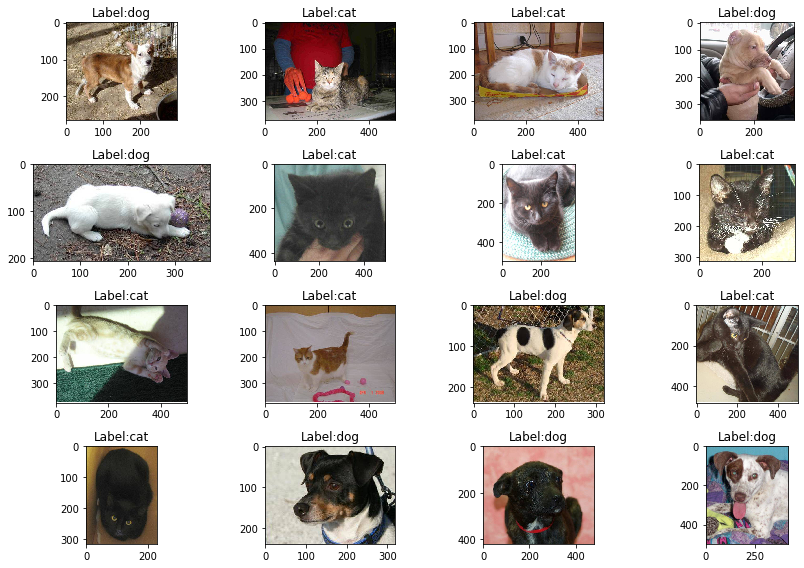

In [16]:
# 랜덤시드 고정
np.random.seed(123)

# Test 데이터의 데이터 목록
flist = glob.glob(TRAIN_FILE_PATH+'*.jpg')

# 랜덤으로 Test 데이터에서 데이터 가져오기
samples = random.choices(population=range(0, len(train_df)), k=16)

# 추출한 Test 데이터 시각화
plt.figure(figsize=(12, 8))

# 각 Test 데이터 시각화
for count, n in enumerate(samples, start=1):
    plt.subplot(4, 4, count)
    flabel = os.path.basename(flist[n]).split('.')[0]
    img = cv2.imread(flist[n])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype('float32') / 255
    plt.imshow(img, interpolation='nearest')
    tmp = "Label:" + flabel
    plt.title(tmp)

plt.tight_layout()
plt.show()

### 모델링

 앞선 예제에서는 직접 CNN 모델을 구성하여 학습을 진행하였지만, 이번 예제에서는 VGGNet, ResNet, MobileNet과 같이 보편적으로 성능이 좋다고 알려져있는 CNN 모델을 사용해보자. Keras에서는 application 모듈에서 Pretrained된 모델을 사용할 수 있다. 이미지 분류에 사용할 수 있는 모델의 목록은 아래와 같다.
 
- Xception
- VGG16
- VGG19
- ResNet, ResNetV2
- InceptionV3
- InceptionResNetV2
- MobileNet
- MobileNetV2
- DenseNet
- NASNet

이번 예제에서는 **`VGG-16`을 사용**해보도록 하자.

<img src='https://neurohive.io/wp-content/uploads/2018/11/vgg16.png' width=80%>

출처 : [Keras Documentation](https://keras.io/applications/)

#### VGG16 모델 생성

In [17]:
# VGG16 객체 생성
base_model = VGG16(input_shape=INPUT_SHAPE,  # CIFAR-10의 이미지 형태
                   include_top=False,  # FC Layer를 제거
                   weights='imagenet')

# VGG16의 모든 Layer를 학습가능하게
base_model.trainable = True

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### VGG-16 미세 조정

In [18]:
# VGG-16의 상단 Layer를 학습가능여부
set_trainable = False

# block5_conv1 라는 이름의 Layer를 만나면 학습가능하게끔
for layer in tqdm(base_model.layers):
    if layer.name in ['block4_conv3','block5_conv3']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

100%|██████████| 19/19 [00:00<00:00, 46305.51it/s]


In [19]:
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]

pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional....,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPoo...,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional....,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional....,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPoo...,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional....,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional....,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional....,block3_conv3,False


#### 모델 생성

In [20]:
model = Sequential()

model.add(base_model) # VGG-16 추가
model.add(GlobalAveragePooling2D()) # Transfer Learning을 진행할때 항상 GAP Layer 추가

model.add(Dense(len(CATDOG_CLASSES), activation='softmax')) # 분류할 FC Layer 추가

#### 모델 컴파일하기

In [21]:
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

#### 모델 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 9,440,258
Non-trainable params: 5,275,456
_________________________________________________________________


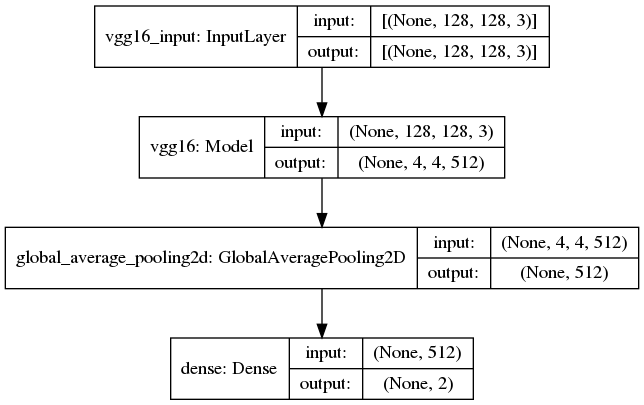

In [22]:
model.summary()

plot_model(model, to_file='../img/model/cat_dog_vgg16.png', show_shapes=True)

### 모델 학습하기 

In [23]:
# 모델 학습하기
# ImageDataGenerator이기 때문에 fit_generator로 학습을 진행해야함
history = model.fit_generator(
    train_generator,  
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE
)

Epoch 1/10
1066/1066 [==============================] - 70s 65ms/step - loss: 0.2422 - acc: 0.8956 - val_loss: 0.1422 - val_acc: 0.9401
Epoch 2/10
1066/1066 [==============================] - 69s 64ms/step - loss: 0.1507 - acc: 0.9353 - val_loss: 0.1476 - val_acc: 0.9398
Epoch 3/10
1066/1066 [==============================] - 69s 64ms/step - loss: 0.1197 - acc: 0.9514 - val_loss: 0.1155 - val_acc: 0.9506
Epoch 4/10
1066/1066 [==============================] - 69s 65ms/step - loss: 0.1040 - acc: 0.9591 - val_loss: 0.1141 - val_acc: 0.9541
Epoch 5/10
1066/1066 [==============================] - 69s 64ms/step - loss: 0.0886 - acc: 0.9651 - val_loss: 0.1018 - val_acc: 0.9574
Epoch 6/10
1066/1066 [==============================] - 69s 64ms/step - loss: 0.0752 - acc: 0.9728 - val_loss: 0.1046 - val_acc: 0.9579
Epoch 7/10
1066/1066 [==============================] - 69s 64ms/step - loss: 0.0704 - acc: 0.9732 - val_loss: 0.1069 - val_acc: 0.9574
Epoch 8/10
1066/1066 [==========================

In [24]:
# 학습한 모델 저장하기
model.save('../bin/cat_dog_vgg16.h5')

### 모델 평가하기

In [25]:
# Train 데이터에 대한 Loss와 Accuracy
train_loss, train_acc = model.evaluate_generator(train_generator,verbose=0)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

# Validation 데이터에 대한 Loss와 Accuracy
validation_loss, validation_acc = model.evaluate_generator(validation_generator,verbose=0)
print('Test Loss : {}'.format(validation_loss))
print('Test Accuracy : {}'.format(validation_acc))

Train Loss : 0.05913539709513891
Train Accuracy : 0.9781249761581421
Test Loss : 0.19414071359452056
Test Accuracy : 0.9430000185966492


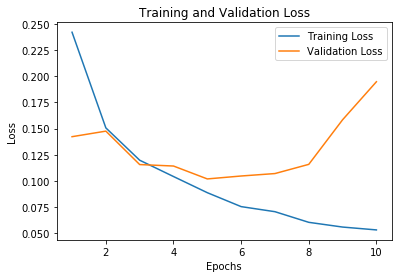

In [26]:
# Train / Validation 데이터에 대한 Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

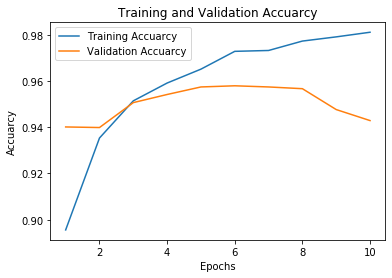

In [27]:
# Train / Validation 데이터에 대한 Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

### 모델 검증하기

In [30]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print('Test Loss : {}'.format(test_loss))
print('Test Accuracy : {}'.format(test_acc))

Test Loss : 0.19926137812348055
Test Accuracy : 0.948199987411499


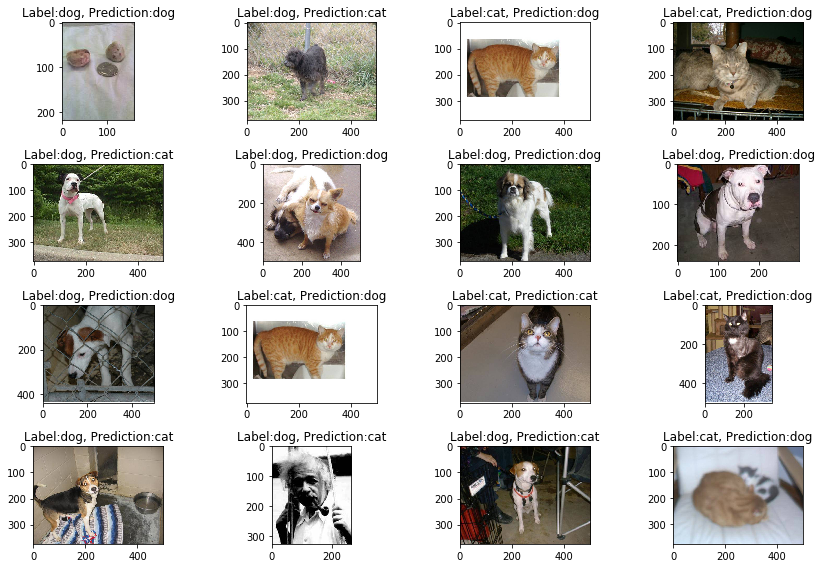

In [37]:
# 재연성을 위하여 랜덤시드 고정
np.random.seed(1234)

# Test 데이터 예측하기
predicted_result = model.predict_generator(test_generator,steps=10)

# 예측한 데이터의 Label 가져오기
predicted_labels = np.argmax(predicted_result, axis=1)

# Test 데이터의 데이터 목록
flist = glob.glob(TEST_FILE_PATH+'*.jpg')

# 랜덤으로 Test 데이터에서 데이터 가져오기
samples = np.random.randint(low= 0, high=len(predicted_labels), size=16)

# 추출한 Test 데이터 시각화
plt.figure(figsize=(12, 8))

# 각 Test 데이터 시각화
for count, n in enumerate(samples, start=1):
    plt.subplot(4, 4, count)
    flabel = os.path.basename(flist[n]).split('.')[0]
    img = cv2.imread(flist[n])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype('float32') / 255
    plt.imshow(img, interpolation='nearest')
    tmp = "Label:" + flabel + ", Prediction:" + \
        CATDOG_CLASSES[predicted_labels[n]]
    plt.title(tmp)

plt.tight_layout()
plt.savefig('../img/cat_dog_wrong_result.png')
plt.show()

### 다음 예제에서는

<img src='../img/theory/compare_models.jpg'>

출처 : https://miro.medium.com/max/5250/1*n16lj3lSkz2miMc_5cvkrA.jpeg)


VGG16을 통해서 이제는 개와 고양이의 클래스를 가진 RGB 이미지에 대해서도 훌륭히 이미지 분류가 되는 것을 확인할 수 있다. 하지만 여전히 한가지 문제점은 VGG16은 엄청난 파라미터 때문에(이번 예제에서 학습만 파라미터만 14,602,954개) NUC와 같은 디바이스에서는 학습이 더디게 진행될 수 있다는 점이다. 그래서 다음 예제에서는 ResNet을 통하여 파라미터를 더 줄이면서 더 많은 클래스를 분류하는 예제를 해보자.

---

## 참고

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html